In [ ]:
import yfinance as yf

In [2]:
from requests import Session
from requests_cache import CacheMixin, SQLiteCache
from requests_ratelimiter import LimiterMixin, MemoryQueueBucket
from pyrate_limiter import Duration, RequestRate, Limiter
class CachedLimiterSession(CacheMixin, LimiterMixin, Session):
    pass

session = CachedLimiterSession(
    limiter=Limiter(RequestRate(2, Duration.SECOND*5)),  # max 2 requests per 5 seconds
    bucket_class=MemoryQueueBucket,
    backend=SQLiteCache("yfinance.cache"),
)

In [5]:
from datetime import datetime
import yfinance as yf
today = datetime.today().strftime('%Y-%m-%d')
nvda = yf.Ticker("NVDA")
price_nvda = nvda.history(start = '2020-01-01', end =today , interval = '1d')

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-07-30 00:00:00-04:00,111.519997,111.989998,102.540001,103.730003,486833300,0.0,0.0
2024-07-31 00:00:00-04:00,112.900002,118.339996,110.879997,117.019997,473174200,0.0,0.0
2024-08-01 00:00:00-04:00,117.529999,120.160004,106.809998,109.209999,523462300,0.0,0.0
2024-08-02 00:00:00-04:00,103.760002,108.720001,101.370003,107.269997,482027500,0.0,0.0
2024-08-05 00:00:00-04:00,92.059998,103.410004,90.690002,100.449997,552842400,0.0,0.0
2024-08-06 00:00:00-04:00,103.839996,107.709999,100.550003,104.250000,409012100,0.0,0.0
2024-08-07 00:00:00-04:00,107.809998,108.800003,98.690002,98.910004,411440400,0.0,0.0
2024-08-08 00:00:00-04:00,102.000000,105.500000,97.519997,104.970001,391910000,0.0,0.0
2024-08-09 00:00:00-04:00,105.639999,106.599998,103.430000,104.750000,290844200,0.0,0.0


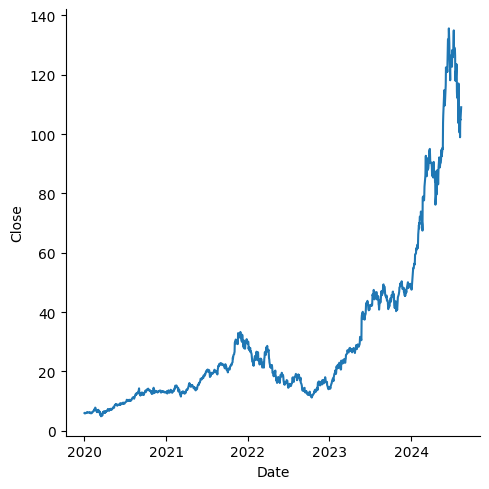

In [12]:
import seaborn as sns
sns.relplot(data = price_nvda, x = 'Date', y = 'Close', kind = 'line')

In [11]:
df = price_nvda
df['t-1'] = price_nvda['Close'].shift(1)
df['t+1'] = price_nvda['Close'].shift(-1)
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits,t-1,t+1
Date,,,,,,,,,
2020-01-02 00:00:00-05:00,5.944749,5.973632,5.894203,5.973632,237536000,0.0,0.0,NaN,5.878019
2020-01-03 00:00:00-05:00,5.853867,5.921843,5.828967,5.878019,205384000,0.0,0.0,5.973632,5.902670
2020-01-06 00:00:00-05:00,5.784647,5.907899,5.758503,5.902670,262636000,0.0,0.0,5.878019,5.974131
2020-01-07 00:00:00-05:00,5.931055,6.019946,5.885987,5.974131,314856000,0.0,0.0,5.902670,5.985336
2020-01-08 00:00:00-05:00,5.969899,6.026670,5.929811,5.985336,277108000,0.0,0.0,5.974131,6.051071
...,...,...,...,...,...,...,...,...,...
2024-08-06 00:00:00-04:00,103.839996,107.709999,100.550003,104.250000,409012100,0.0,0.0,100.449997,98.910004
2024-08-07 00:00:00-04:00,107.809998,108.800003,98.690002,98.910004,411440400,0.0,0.0,104.250000,104.970001
2024-08-08 00:00:00-04:00,102.000000,105.500000,97.519997,104.970001,391910000,0.0,0.0,98.910004,104.750000


## Single Train-test split

In [27]:
train_size = int(len(df) * 0.7)
train, test = df[0:train_size], df[train_size:len(df)]
train.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,t-1,t+1
Date,,,,,,,,,
2020-01-02 00:00:00-05:00,5.944749,5.973632,5.894203,5.973632,237536000,0.0,0.0,NaN,5.878019
2020-01-03 00:00:00-05:00,5.853867,5.921843,5.828967,5.878019,205384000,0.0,0.0,5.973632,5.902670
2020-01-06 00:00:00-05:00,5.784647,5.907899,5.758503,5.902670,262636000,0.0,0.0,5.878019,5.974131
2020-01-07 00:00:00-05:00,5.931055,6.019946,5.885987,5.974131,314856000,0.0,0.0,5.902670,5.985336
2020-01-08 00:00:00-05:00,5.969899,6.026670,5.929811,5.985336,277108000,0.0,0.0,5.974131,6.051071


In [28]:
test.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,t-1,t+1
Date,,,,,,,,,
2023-03-24 00:00:00-04:00,27.020113,27.156057,26.344384,26.768213,454920000,0.0,0.0,27.180048,26.520315
2023-03-27 00:00:00-04:00,26.826192,26.989126,26.354382,26.520315,361026000,0.0,0.0,26.768213,26.399364
2023-03-28 00:00:00-04:00,26.436350,26.502324,25.839591,26.399364,356104000,0.0,0.0,26.520315,26.973131
2023-03-29 00:00:00-04:00,26.814197,27.067093,26.586288,26.973131,393694000,0.0,0.0,26.399364,27.371971
2023-03-30 00:00:00-04:00,27.218034,27.487926,27.091084,27.371971,364516000,0.0,0.0,26.973131,27.765814


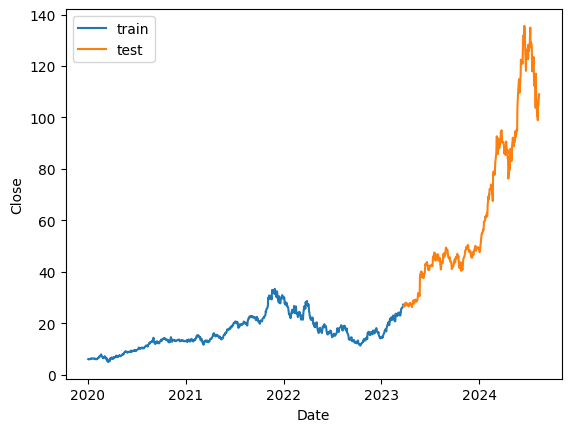

In [32]:
import matplotlib.pyplot as plt

sns.lineplot( x = 'Date', y = 'Close', data = train, label = 'train')
sns.lineplot( x = 'Date', y = 'Close', data = test, label = 'test')
plt.show()
